## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
from keras import optimizers
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

opt = optimizers.SGD(lr=0.001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.2521 - accuracy: 0.1598 - val_loss: 2.2011 - val_accuracy: 0.2063
Epoch 2/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.1685 - accuracy: 0.2242 - val_loss: 2.1374 - val_accuracy: 0.2506
Epoch 3/500
50000/50000 [==============================] - 5s 101us/step - loss: 2.1133 - accuracy: 0.2496 - val_loss: 2.0888 - val_accuracy: 0.2613
Epoch 4/500
50000/50000 [==============================] - 5s 103us/step - loss: 2.0697 - accuracy: 0.2702 - val_loss: 2.0496 - val_accuracy: 0.2798
Epoch 5/500
50000/50000 [==============================] - 5s 101us/step - loss: 2.0346 - accuracy: 0.2841 - val_loss: 2.0180 - val_accuracy: 0.2944
Epoch 6/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.0053 - accuracy: 0.2963 - val_loss: 1.9913 - val_accuracy: 0.3012
Epoch 7/500
50000/50000 [==============================] 

50000/50000 [==============================] - 5s 95us/step - loss: 1.6662 - accuracy: 0.4192 - val_loss: 1.6740 - val_accuracy: 0.4116
Epoch 56/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6631 - accuracy: 0.4211 - val_loss: 1.6706 - val_accuracy: 0.4125
Epoch 57/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.6602 - accuracy: 0.4210 - val_loss: 1.6640 - val_accuracy: 0.4172
Epoch 58/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6569 - accuracy: 0.4222 - val_loss: 1.6654 - val_accuracy: 0.4128
Epoch 59/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6535 - accuracy: 0.4245 - val_loss: 1.6606 - val_accuracy: 0.4180
Epoch 60/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6508 - accuracy: 0.4244 - val_loss: 1.6562 - val_accuracy: 0.4194
Epoch 61/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.6478 - accuracy: 0.4255 - val_loss: 

Epoch 110/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.5284 - accuracy: 0.4664 - val_loss: 1.5487 - val_accuracy: 0.4586
Epoch 111/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5262 - accuracy: 0.4672 - val_loss: 1.5499 - val_accuracy: 0.4558
Epoch 112/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.5246 - accuracy: 0.4658 - val_loss: 1.5476 - val_accuracy: 0.4592
Epoch 113/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.5224 - accuracy: 0.4676 - val_loss: 1.5480 - val_accuracy: 0.4569
Epoch 114/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.5206 - accuracy: 0.4685 - val_loss: 1.5469 - val_accuracy: 0.4524
Epoch 115/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.5185 - accuracy: 0.4702 - val_loss: 1.5405 - val_accuracy: 0.4581
Epoch 116/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5163 - accura

50000/50000 [==============================] - 5s 94us/step - loss: 1.4322 - accuracy: 0.5006 - val_loss: 1.4818 - val_accuracy: 0.4729
Epoch 165/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.4306 - accuracy: 0.4999 - val_loss: 1.4778 - val_accuracy: 0.4729
Epoch 166/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.4284 - accuracy: 0.5013 - val_loss: 1.4759 - val_accuracy: 0.4785
Epoch 167/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.4273 - accuracy: 0.5015 - val_loss: 1.4742 - val_accuracy: 0.4763
Epoch 168/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.4259 - accuracy: 0.5013 - val_loss: 1.4719 - val_accuracy: 0.4836
Epoch 169/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4241 - accuracy: 0.5022 - val_loss: 1.4703 - val_accuracy: 0.4831
Epoch 170/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4229 - accuracy: 0.5029 - val_

50000/50000 [==============================] - 5s 96us/step - loss: 1.3523 - accuracy: 0.5285 - val_loss: 1.4278 - val_accuracy: 0.4919
Epoch 219/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.3505 - accuracy: 0.5290 - val_loss: 1.4233 - val_accuracy: 0.4929
Epoch 220/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.3497 - accuracy: 0.5282 - val_loss: 1.4243 - val_accuracy: 0.4939
Epoch 221/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3484 - accuracy: 0.5297 - val_loss: 1.4228 - val_accuracy: 0.4968
Epoch 222/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3474 - accuracy: 0.5300 - val_loss: 1.4431 - val_accuracy: 0.4872
Epoch 223/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3459 - accuracy: 0.5299 - val_loss: 1.4225 - val_accuracy: 0.4949
Epoch 224/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3437 - accuracy: 0.5295 - va

50000/50000 [==============================] - 5s 96us/step - loss: 1.2827 - accuracy: 0.5529 - val_loss: 1.3866 - val_accuracy: 0.5080
Epoch 273/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2810 - accuracy: 0.5544 - val_loss: 1.3940 - val_accuracy: 0.5048
Epoch 274/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2801 - accuracy: 0.5536 - val_loss: 1.3963 - val_accuracy: 0.4994
Epoch 275/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2784 - accuracy: 0.5551 - val_loss: 1.4068 - val_accuracy: 0.5010
Epoch 276/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2777 - accuracy: 0.5543 - val_loss: 1.3972 - val_accuracy: 0.5034
Epoch 277/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2757 - accuracy: 0.5551 - val_loss: 1.3895 - val_accuracy: 0.5091
Epoch 278/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2749 - accuracy: 0.5551 - val_

50000/50000 [==============================] - 5s 97us/step - loss: 1.2189 - accuracy: 0.5754 - val_loss: 1.3672 - val_accuracy: 0.5145
Epoch 327/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2170 - accuracy: 0.5754 - val_loss: 1.3590 - val_accuracy: 0.5161
Epoch 328/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2168 - accuracy: 0.5761 - val_loss: 1.3629 - val_accuracy: 0.5136
Epoch 329/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2164 - accuracy: 0.5758 - val_loss: 1.3617 - val_accuracy: 0.5126
Epoch 330/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2150 - accuracy: 0.5765 - val_loss: 1.3554 - val_accuracy: 0.5195
Epoch 331/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2131 - accuracy: 0.5773 - val_loss: 1.3580 - val_accuracy: 0.5152
Epoch 332/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2118 - accuracy: 0.5789 - val

50000/50000 [==============================] - 5s 96us/step - loss: 1.1588 - accuracy: 0.5963 - val_loss: 1.3653 - val_accuracy: 0.5171
Epoch 381/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1563 - accuracy: 0.5986 - val_loss: 1.3452 - val_accuracy: 0.5218
Epoch 382/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1563 - accuracy: 0.5972 - val_loss: 1.3384 - val_accuracy: 0.5254
Epoch 383/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1553 - accuracy: 0.5988 - val_loss: 1.3532 - val_accuracy: 0.5205
Epoch 384/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1549 - accuracy: 0.5993 - val_loss: 1.3874 - val_accuracy: 0.5109
Epoch 385/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1526 - accuracy: 0.5996 - val_loss: 1.3356 - val_accuracy: 0.5258
Epoch 386/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1536 - accuracy: 0.5990 - val_

50000/50000 [==============================] - 5s 96us/step - loss: 1.1020 - accuracy: 0.6188 - val_loss: 1.3492 - val_accuracy: 0.5201
Epoch 435/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1012 - accuracy: 0.6174 - val_loss: 1.3364 - val_accuracy: 0.5269
Epoch 436/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0999 - accuracy: 0.6171 - val_loss: 1.3339 - val_accuracy: 0.5247
Epoch 437/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0999 - accuracy: 0.6179 - val_loss: 1.3602 - val_accuracy: 0.5187
Epoch 438/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0976 - accuracy: 0.6193 - val_loss: 1.3412 - val_accuracy: 0.5238
Epoch 439/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0962 - accuracy: 0.6184 - val_loss: 1.3254 - val_accuracy: 0.5275
Epoch 440/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0940 - accuracy: 0.6199 - val_

50000/50000 [==============================] - 5s 95us/step - loss: 1.0498 - accuracy: 0.6364 - val_loss: 1.3325 - val_accuracy: 0.5309
Epoch 489/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.0444 - accuracy: 0.6384 - val_loss: 1.3326 - val_accuracy: 0.5321
Epoch 490/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.0446 - accuracy: 0.6377 - val_loss: 1.3596 - val_accuracy: 0.5195
Epoch 491/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0426 - accuracy: 0.6389 - val_loss: 1.3477 - val_accuracy: 0.5220
Epoch 492/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.0410 - accuracy: 0.6385 - val_loss: 1.3782 - val_accuracy: 0.5130
Epoch 493/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0416 - accuracy: 0.6397 - val_loss: 1.3351 - val_accuracy: 0.5318
Epoch 494/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0388 - accuracy: 0.6397 - va

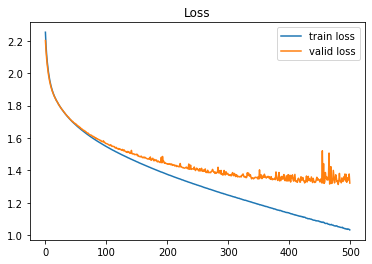

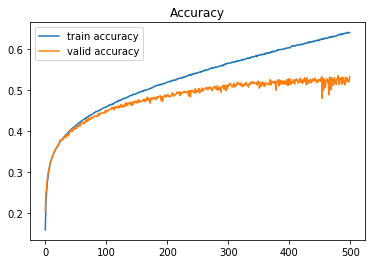

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()